# Diabetes Prediction
###  Course: LinkedIn Learning Hands-On Data Science and AI for Healthcare
### Intented Use:

### Data source: 
https://data.mendeley.com/datasets/wj9rwkp9c2/1 Rashid, Ahlam (2020), “Diabetes Dataset”, Mendeley Data, V1, doi: 10.17632/wj9rwkp9c2.1

###  Limitations


### Ethical Considerations


##### Created on 1/2/25


## 1. Data Sourcing

In [86]:
import pandas as pd
df_diabetes = pd.read_csv('https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd',delimiter=',',header='infer')

In [87]:
df_diabetes

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


### 1.1 Data Inspection

In [88]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [89]:
print ('Number of unique IDs: ' + str(df_diabetes['ID'].nunique())
       + '\nNumber of unique Classes: ' + str(df_diabetes['CLASS'].nunique())
       + '\nNumber of unique Genders: ' + str(df_diabetes['Gender'].nunique())
      )


Number of unique IDs: 800
Number of unique Classes: 5
Number of unique Genders: 3


In [90]:
print('Distinct Class Values')
df_diabetes['CLASS'].value_counts()

Distinct Class Values


CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [91]:
df_diabetes['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [92]:
df_diabetes['CLASS'] = df_diabetes['CLASS'].str.replace(' ', '') #removing the space in class variables
df_diabetes['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [93]:
df_diabetes['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [94]:
df_diabetes['Gender'] = df_diabetes['Gender'].apply(str.upper)
df_diabetes['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [95]:
df_diabetes['AGE'].nunique()

50

In [96]:
#Appending age range bucket to exisiting dataframe
age_range_buckets = ["{0} - {1}".format(age, age + 10) for age in range(20, 100, 10)]
df_diabetes['age_range'] = pd.cut(x=df_diabetes['AGE'], bins=8, labels=age_range_buckets)
df_diabetes

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,60 - 70
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,20 - 30
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,60 - 70
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,60 - 70
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,30 - 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,80 - 90
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,30 - 40
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,30 - 40
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,40 - 50


In [97]:
df_diabetes['age_range'].value_counts()

age_range
60 - 70     476
70 - 80     274
50 - 60      79
40 - 50      58
30 - 40      54
80 - 90      36
90 - 100     19
20 - 30       4
Name: count, dtype: int64

### 1.2 Data Visualization 

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Gender'>

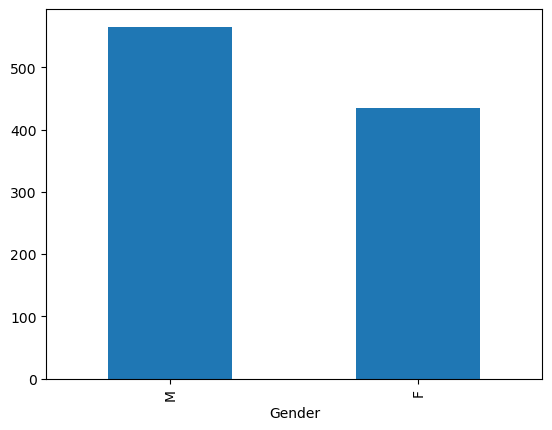

In [81]:
df_diabetes['Gender'].value_counts().plot(kind = 'bar')

### 1.3 Data Preprocessing

In [101]:
from sklearn.preprocessing import LabelEncoder
#df2 = df_diabetes.drop(['ID','No_Pation','AGE'], axis=1)
df2 = df_diabetes

le1 = LabelEncoder()
df2['Gender'] =le1.fit_transform(df2['Gender'])
le2 = LabelEncoder()
df2['CLASS'] =le2.fit_transform(df2['CLASS'])
le3 = LabelEncoder()
df2['age_range'] =le3.fit_transform(df2['age_range'])
correlation_values = df2.corr()

In [102]:
correlation_values

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
ID,1.000000,0.064920,0.018070,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409,-0.057146,-0.066356
No_Pation,0.064920,1.000000,0.051795,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719,-0.047571,-0.083628
Gender,0.018070,0.051795,1.000000,0.021486,0.116311,0.154870,-0.009362,-0.064763,0.052111,-0.130130,0.054563,0.194120,0.072097,0.103397,0.023543
AGE,-0.065980,-0.088006,0.021486,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.443009,0.975731
Urea,-0.094434,-0.019160,0.116311,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.067010,0.106910
Cr,-0.102457,0.000692,0.154870,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.037500,0.063510
HbA1c,-0.007571,-0.032057,-0.009362,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.555321,0.365895
Chol,0.044390,-0.030171,-0.064763,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.167375,0.026507
TG,-0.055908,-0.039885,0.052111,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.182299,0.146934
HDL,0.026231,-0.013357,-0.130130,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.001248,-0.015973


<Axes: >

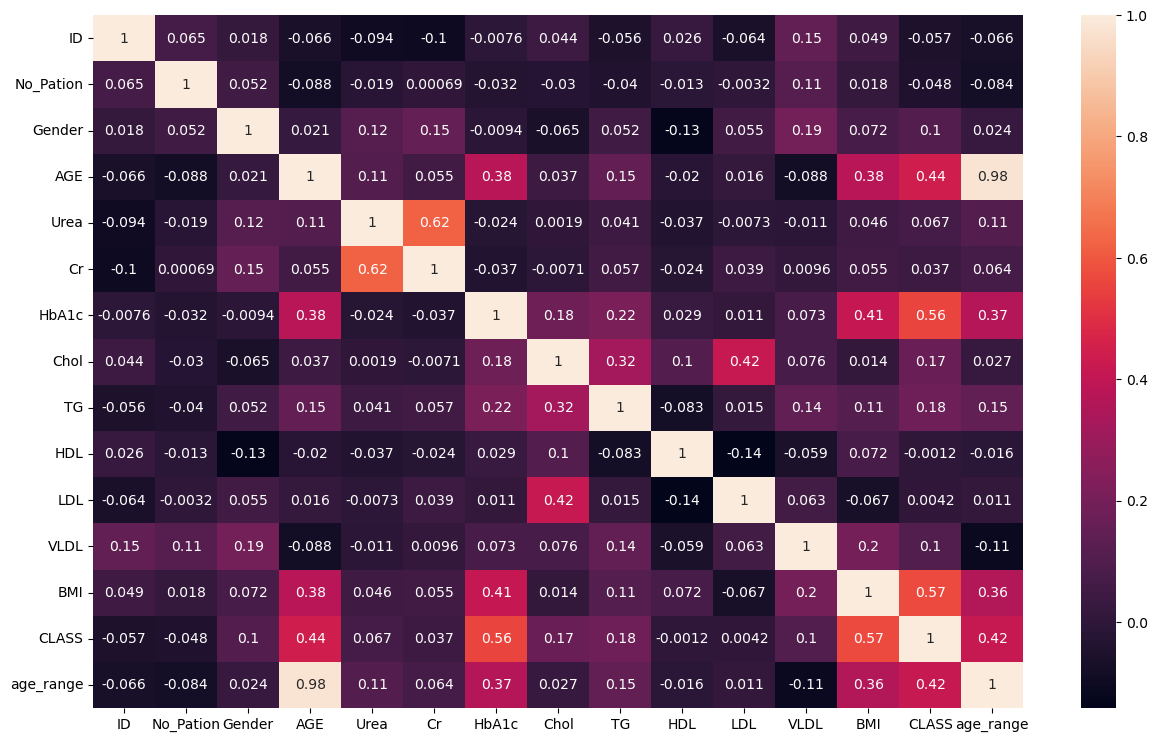

In [103]:
plt.figure(figsize=(15,9))
sns.heatmap(correlation_values,annot = True)

In [104]:
df2 = df2.drop(['ID','No_Pation','AGE'], axis=1)
df2

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,0
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2,6
996,1,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2,1
997,1,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2,1
998,1,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2,2


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [107]:
columns_to_scale = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']
scale_values = df2[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
df2_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)
df2_scaled

,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...
995,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
996,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
997,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
998,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


In [108]:
df3 = pd.concat([df2,df2_scaled],axis=1)
df3

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,...,age_range,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,...,0,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,...,1,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,...,6,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
996,1,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,...,1,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
997,1,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,...,1,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
998,1,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,...,2,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


In [109]:
from sklearn.model_selection import train_test_split

X = df3[['Gender','age_range','Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']].values
y = df3['CLASS'].values
train_set, test_set,train_label,test_label = train_test_split(X,y,test_size=0.20,random_state=0)

In [110]:
X[0]

array([0.        , 4.        , 0.109375  , 0.05037783, 0.26490066,
       0.40776699, 0.04444444, 0.22680412, 0.11458333, 0.01146132,
       0.17391304])

## 2. Model Selection

In [111]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [113]:
#TODO Explain the model architecture 
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [114]:
results = []
names = []

In [115]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10)
    cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})". format(name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/davidcruz/anaconda3/envs/LinkedInLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/davidcruz/anaconda3/envs/LinkedInLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/davidcruz/anaconda3/envs/LinkedInLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/davidcruz/anaconda3/envs

LR: 0.8200000000000001 (0.3306055050963308)
KNN: 0.7809999999999999 (0.3497270364155451)
NB: 0.8220000000000001 (0.2690278795961489)
SVC: 0.783 (0.35273361053350155)
RFC: 0.841 (0.3262039239494216)
DTR: 0.8550000000000001 (0.27717323103070396)
XGB: nan (nan)


/Users/davidcruz/anaconda3/envs/LinkedInLearning/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/davidcruz/anaconda3/envs/LinkedInLearning/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davidcruz/anaconda3/envs/LinkedInLearning/lib/python3.11/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/davidcruz/anaconda3/envs/LinkedInLearning/lib/pyth

In [116]:
XGBClassifier_model = XGBClassifier()
XGBClassifier_model_fitted = XGBClassifier_model.fit(train_set,train_label)
XGBClassifier_model_prediction = XGBClassifier_model.predict(test_set)

In [117]:
df3['CLASS'].unique() #0 means No diabetes, 1 means predicted, 2 means diabetes

array([0, 1, 2])

## 3. Model Evaluations

In [118]:
print('XGB Classifier Accuracy Score:\n', accuracy_score(test_label, XGBClassifier_model_prediction))

XGB Classifier Accuracy Score:
 0.995


In [119]:
print('XGB Classifier Report:\n', classification_report(test_label,XGBClassifier_model_prediction,target_names=['0','1','2']))

XGB Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      1.00       176

    accuracy                           0.99       200
   macro avg       1.00      0.96      0.98       200
weighted avg       1.00      0.99      0.99       200



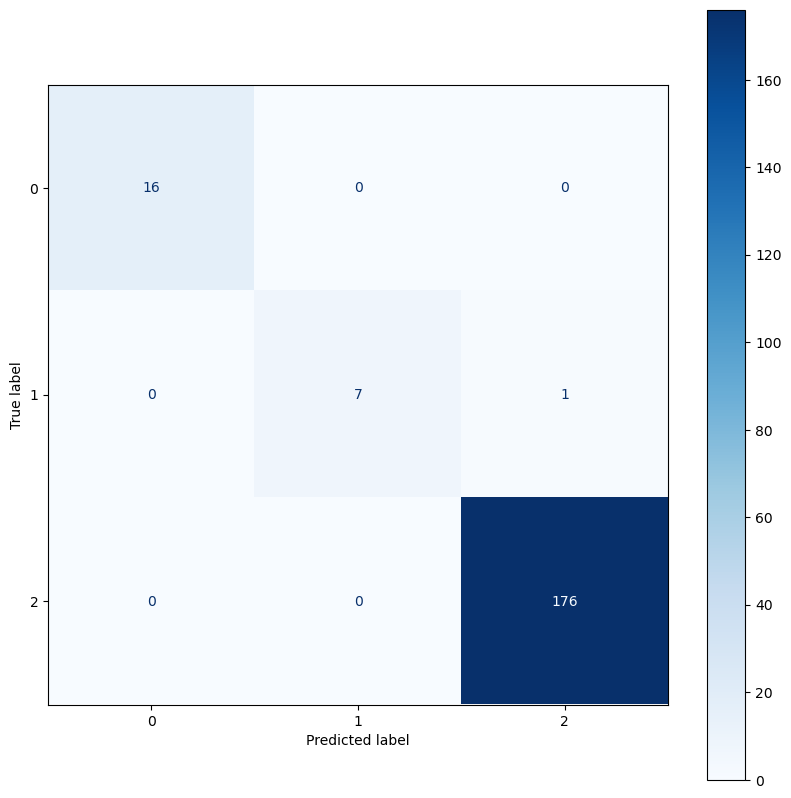

In [120]:
XGBClassifier_matrix = confusion_matrix(test_label,XGBClassifier_model_prediction)
XGBClassifier_confusion_matrix_display = ConfusionMatrixDisplay(XGBClassifier_matrix)
fig, ax = plt.subplots(figsize=(10,10))
XGBClassifier_confusion_matrix_display.plot(cmap=plt.cm.Blues,ax=ax)